# Classification
In a previous leason, we predicted the race results with a regressor.<br>
We predicted race positions such as 3.234.<br>
These results can either get modified to more useful results, for example simply by rounding.<br>
In this notebook we will try to classify the results.<br>
This might not produce the best results as this is not a real classification problem.<br>
There are two final, useful aspects of scikit-learn, we still need to learn though:<br>
- Create a pipeline
- Save the model

In [1]:
import pandas as pd
import seaborn as sns

## Read the data
We will load our well-known race_df and our new track label df

In [2]:
#Load both dfs:
race_df = pd.read_pickle('race_df_with_advanced_features.pkl')
track_df = pd.read_csv('labeled_tracks.csv',sep=';')
track_df.head(5)

Unnamed: 0                         race_name  best_fp_t     v_m_s  \
0        3753           grosser-preis-der-eifel    86361.0 -0.249743   
1        3786  grosser-preis-der-emilia-romagna    74726.0  0.536206   
2        3601      grosser-preis-der-steiermark    63660.0  1.076629   
3        3724         grosser-preis-der-toskana    76530.0 -3.212874   
4         461         grosser-preis-der-tuerkei    86037.0  0.348287   

     length  labels  
0  0.000000       0  
1 -0.261820       2  
2 -0.663865       2  
3 -1.623962       1  
4  0.245539       3

## Use the labels:
To use the labels for a new ML model, we will:
- Merge the labels to our main race_df
- Hot-encode them

In [3]:
#Merge the labels to race_df
track_df = track_df[['race_name','labels']].reset_index(drop=True)
print(race_df.shape)
race_df = race_df.merge(track_df,how='left',on='race_name')
print(race_df.shape)

(4718, 50)
(4718, 51)


In [4]:
#Encode the new column label with pd.get_dummies, use prefix "track_type"
hot_encoded_df = pd.get_dummies(race_df['labels'], prefix='track_type')
print(hot_encoded_df.shape)
print(race_df.shape)
race_df = pd.concat([race_df,hot_encoded_df],axis=1)
print(race_df.shape)

(4718, 4)
(4718, 51)
(4718, 55)


## Chose our features
Create a list with the features, you are interesed in. It is up to you.

In [5]:
sorted(race_df.columns)
feature_columns=['best_fp_pos',
                'hist_q_pos',
                'hist_race_pos',
                'track_type_0',
                'track_type_1',
                'track_type_2',
                'track_type_3',
                'worst_fp_pos']

### Create X_train,X_test,y_train,y_test
Once more, we will use 2020 as cut-off date.<br>
This time, we will predict the champion ship points (<i>champ_points</i>).

In [6]:
#Create the four data frames / series
y_column = 'champ_points'

#Drop NaNs in relevant columns
race_df = race_df.dropna(subset=feature_columns+[y_column, 'year'])
X_train = race_df[race_df['year']<2020][feature_columns]
y_train = race_df[race_df['year']<2020][y_column]

X_test = race_df[race_df['year']<=2020][feature_columns]
y_test = race_df[race_df['year']<=2020][y_column]

## Simple pre-processing and the fit
We will perform some pre-processing steps and fit the data to a model.<br>
However we will create a pipeline for this.<br>
Pipeline have the advantage of having the pre-processing included in the ML model.<br>
When predicting new data, it will experience the same transformations as the training data.<br>
The pipeline object itself can get used just like a normal model from previous lessons.

In [7]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [8]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

## Save our new model / pipline:
To save a model, we can use joblib with dump
    

In [9]:
from joblib import dump, load
dump(pipe, 'our_piped_model.joblib') 

['our_piped_model.joblib']

In [10]:
#Now we will delete the pipe:
del(pipe)

## Load our model:
For that, we can use joblib's load

In [11]:
pipe = load('our_piped_model.joblib') 

## Predict Championship Points:

In [12]:
# Predicting with a pipe, works just like it does with a normal model:
y_pred = pipe.predict(X_test)

## Visualize Results:

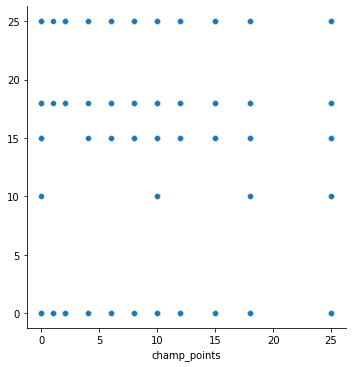

In [13]:
#Create on final plot:
sns.relplot(x=y_test,y=y_pred)

Oh, this does not look good at all! Well, we just wanted to see how piplines, saving and loading a model works.<br>
## YOU HAVE COMPLETED THE TRAINING!!!

## For those that still have some time left over:
Read the cell above once more